In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# One-hot encoding for the labels
encoder = LabelBinarizer()
y_onehot = encoder.fit_transform(y)
y_onehot

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [4]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
X_train.shape

(120, 4)

In [6]:
X_train.shape[1]

4

In [11]:
y_train.shape

(120, 3)

In [7]:

# Define the neural network model
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    #Dropout(0.2),  # Dropout to reduce overfitting
    Dense(8, activation='relu'),  # Hidden layer
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [12]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [13]:

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16, 
                    validation_data=(X_test, y_test), 
                    verbose=1)


Epoch 1/100
8/8 [==============================] - 11s 767ms/step - loss: 1.0265 - accuracy: 0.4917 - val_loss: 0.9047 - val_accuracy: 0.7333
Epoch 2/100
8/8 [==============================] - 2s 343ms/step - loss: 0.7794 - accuracy: 0.6917 - val_loss: 0.6333 - val_accuracy: 0.7667
Epoch 3/100
8/8 [==============================] - 1s 183ms/step - loss: 0.5707 - accuracy: 0.7750 - val_loss: 0.4542 - val_accuracy: 0.9000
Epoch 4/100
8/8 [==============================] - 1s 107ms/step - loss: 0.4475 - accuracy: 0.8250 - val_loss: 0.3387 - val_accuracy: 0.9333
Epoch 5/100
8/8 [==============================] - 0s 47ms/step - loss: 0.3619 - accuracy: 0.8333 - val_loss: 0.2650 - val_accuracy: 0.9000
Epoch 6/100
8/8 [==============================] - 1s 165ms/step - loss: 0.3101 - accuracy: 0.8500 - val_loss: 0.2101 - val_accuracy: 0.9333
Epoch 7/100
8/8 [==============================] - 1s 110ms/step - loss: 0.2639 - accuracy: 0.8833 - val_loss: 0.1748 - val_accuracy: 0.9333
Epoch 8/100
8

In [14]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 1s 868ms/step - loss: 0.0116 - accuracy: 1.0000
Test Loss: 0.011564209125936031
Test Accuracy: 1.0


In [15]:

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


1/1 [==============================] - 1s 619ms/step


In [ ]:
predictions

In [17]:
predicted_classes

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [18]:
true_classes

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [19]:
predicted_classes - true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:

# Display results
print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

# Save the model
model.save('iris_nn_model.h5')


Predicted classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
True classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [21]:
from tensorflow.keras.models import load_model
model1 = load_model('iris_nn_model.h5')

In [22]:
model1.predict(X_test)

1/1 [==============================] - 0s 283ms/step


array([[8.2062455e-05, 9.9975735e-01, 1.6057673e-04],
       [9.9998617e-01, 1.3876118e-05, 2.9137004e-10],
       [1.1658103e-11, 1.2521566e-06, 9.9999869e-01],
       [2.4812194e-04, 9.9575162e-01, 4.0003001e-03],
       [4.0893454e-05, 9.9447000e-01, 5.4890993e-03],
       [9.9997127e-01, 2.8753831e-05, 5.2504728e-10],
       [2.3053470e-04, 9.9975926e-01, 1.0237562e-05],
       [5.7826833e-07, 5.1521527e-04, 9.9948418e-01],
       [4.3118842e-05, 8.3829713e-01, 1.6165982e-01],
       [2.6720727e-05, 9.9996591e-01, 7.3855690e-06],
       [2.5007419e-05, 1.0648134e-02, 9.8932683e-01],
       [9.9999142e-01, 8.5326474e-06, 7.2110304e-11],
       [9.9999249e-01, 7.5032044e-06, 7.0968856e-11],
       [9.9999094e-01, 9.1145721e-06, 9.2071725e-11],
       [9.9999714e-01, 2.8556108e-06, 3.4791871e-11],
       [4.3651601e-04, 9.9289352e-01, 6.6699265e-03],
       [9.5304088e-08, 1.8883021e-04, 9.9981111e-01],
       [1.6437874e-05, 9.9997723e-01, 6.3652037e-06],
       [1.6393066e-04, 9.992

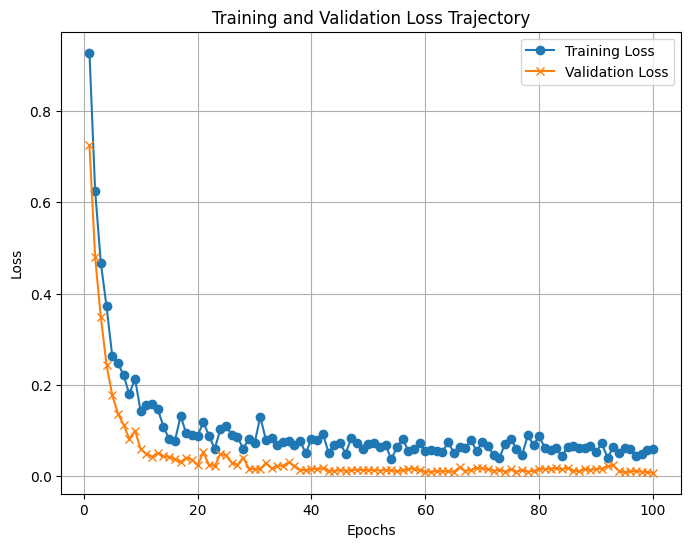

In [3]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the loss trajectory
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss Trajectory')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()